# Laboratorio 2 Redes Neuronales

##### Profesor: Gonzalo Acuña
##### Ayudante: Ignacio Ibañez
##### Alumno: Dany Rubiano 

## 1. Funciones de Transferencia
Las funciones de transferencia tienen como objetivo decidir si una neurona debe activarse o no. Son un proceso algorítmico que transforman el resultado de la función de propagación en la salida real de la neurona.
En la función de transferencia el valor de la salida de combinación puede ser comparada con algún valor umbral para determinar la salida de la neurona. Si la suma es mayor que el valor umbral, neurona generará una señal. Si la suma es menor que el valor umbral, ninguna señal será generada.

Existen dos tipos de funciones de transferencia segun su linealidad, leneales o no lineales.  

### 1.1 Función de Transferencia Lineal
Las funciones de transferencia lineales tienen un comportamiento similar a la de una línea recta. Si en una red neuronal todas las capas son de naturaleza lineal, la función de transferencia final de la última capa no es más que una función lineal de la entrada de la primera capa.

Entre las funciones de transferencia lineales se encuentra la función ReLU, rectificador o unidad lineal rectificada (Rectified Linear Unit), que corresponde a una función lineal real de un solo argumento, continua y diferenciable en todo su dominio, exceptuando el inicio de la rama. 
Se define formalmente como f(x) = max(0,x), donde x pertenece a la entrada de la neurona. La función toma un valor de 0 para entradas negativas y toma valores equivalentes a la entrada cuando son entradas 0 o positivas.

### 1.2 Función de Transferencia No Lineal
Las funciones de transferencia no lineales son aquellas que tienen más de un grado, por lo que su comportamiento es como el de una curva. Al utilizar una función de transferencia no lineal en una red neuronal, se pueden generar asignaciones no lineales desde las entradas a las salidas.

Una de las funciones de transferencia no lineales es la función sigmoidea, la cual tiene la forma matemática:

![sigmo.png](attachment:sigmo.png)
Esta función toma un número de valor real y lo transforma a un valor en el rango entre 0 y 1. En particular, los números negativos grandes se convierten en 0 y los números positivos grandes se convierten en 1. 



## 2. Código de las funciones de transferencia

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Codigo de la primera actividad

# funcion de transferencia lineal 
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

# Funcion de transferencia no lineal
class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2)  

## 3. Funciones Objetivo (Loss Functions)
Las funciones objetivo se utilizan para medir la inconsistencia entre el valor predicho (^y) y el valor real (y).
Es un valor no negativo, donde la solidez del modelo aumenta a medida que disminuye el valor de la función objetivo. 

En esta ocasión se trabajará con el error cuadrático medio y la entropía cruzada.

### 3.1. Error medio cuadrado
La función de error cuadrático medio (MSE) tiene como objetivo minimizar la suma cuadrática del residual enntre el valor preddicho y el valor real.
![MSE.png](attachment:MSE.png)

### 3.2. Entropía  Cruzada
La entropía cruzada mide la divergencia entre dos distribución de probabilidad, si la entropía cruzada es grande, significa que la diferencia entre dos distribuciones es grande, mientras que si la entropía cruzada es pequeña, significa que dos distribuciones son similares entre sí. 
![CE.png](attachment:CE.png)


## 4. Código de las funciones objetivo

In [0]:
# loss functions

def MSE(self, X, y):
    self.yHat = self.forward(X)
    J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
    return J

def CE(self, X, y):
    self.yHat = self.forward(X)
    J = -(1/(self.inputLayerSize))*sum(y*np.log(self.yHat)+(1-y)*np.log(1-self.yHat))
    return J

## 5. Red feed-forward
Las redes neuronales feed-forward son redes donde las conexiones entre las unidades no forman un ciclo. Fueron el primer tipo de red neuronal artificial inventada y son más simples que sus contrapartes como las redes neuronales recurrentes. Su nombre es referido porque la información solo se desplaza hacia adelante en la red, primero a través de los nodos de entrada, luego a través de los nodos ocultos y finalmente a través de los nodos de salida.

![feed-forward.PNG](attachment:feed-forward.PNG)

## 6. Código de la red feed-forward

In [0]:
class Neural_Network(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction, lossFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        self.lossFunction = lossFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        #self.yHat = self.forward(X)
        if self.lossFunction == 'MSE':
            J = MSE(self, X, y)
        elif self.lossFunction == 'CE':
            J = CE(self, X, y)
        return J
    
    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 
    


## 7. Código de entrenamiento de la red

In [0]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


Text(0,0.5,'Costo')

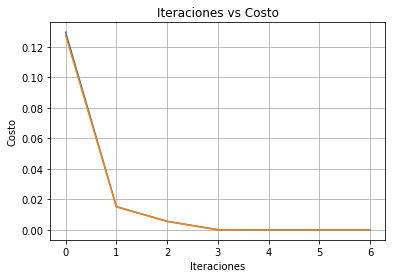

In [0]:
# AND
#X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
#y = np.array(([0], [0], [0], [1]), dtype=float)

#Xtest = np.array(([0,0], [0,1], [1,1]), dtype=float)
#ytest = np.array(([0], [0], [1]), dtype=float)

# OR
#X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
#y = np.array(([0], [1], [1], [1]), dtype=float)

#Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
#ytest = np.array(([0], [1], [1]), dtype=float)

# XOR
X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([0], [1], [1], [0]), dtype=float)

Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
ytest = np.array(([0], [1], [1]), dtype=float)

X = X
y = y  

S = Sigmoid()
R = ReLU()
#NN = Neural_Network(2, 1, 2, S, 'MSE') 
#NN = Neural_Network(2, 1, 2, S, 'CE')
NN = Neural_Network(2, 1, 2, R, 'MSE')
#NN = Neural_Network(2, 1, 2, R, 'CE')

T = trainer(NN)
T.train(X, y, Xtest, ytest)

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Iteraciones vs Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

## 8. Análisis de resultados

Al experimentar con cada una de las compuertas lógicas, los resultados reflejan que los modelos se ajustan en pocas iteraciones en la compuerta OR, mientras que la compuerta AND requiere un poco más de iteraciones, mientras que por otro lado, la compuerta XOR en muchos casos no logra ajustarse de manera correcta.

En una comparación de los resultados en la combinatoria entre la red feed-forward y los parámetros de las funciones de transferecia y las funciones objetivo, se pudo obtener que en las mayoria de los casos la función ReLU en combinación con la función MSE otorga mejores resultados que las otras combinaciones, en términos de la cantidad de iteraciones necesarias y su costo final. Sin embargo, cabe destacar que al probar con una función de transferencia ReLU y la función objetivo de entropía cruzada (CE), el modelo resultaba con un error que no pudo ser controlado. Si se siguiera la lógica de los resultados que mostró la función sigmoide en combinación con la función CE, en comparación con sigmoide y MSE, se podría inferir que ReLU y CE hubiera podido tener los mejores resultados, aunque hay que tomar en cuenta que la combinatoria entre modelos puede arrojar diferentes resultados en función de sus propiedades matemáticas conjuntas. 

Lo anterior se puede comprobar en la teoría, en la cual se encuentra que al utilizar sigmoid como la función de transferencia, la función MSE sufre el problema de la convergencia lenta, mientras que para otras funciones de activación, no tendría ese problema, tal como se pudo evidenciar en la combinatoria con ReLU. 
Al comparar MSE con CE, se desstaca que CE tiene las ventajas de una convergencia rápida y es más probable que alcance la optimización global. 

En cuanto a las funciones de transferencia, la función sigmoide a diferencia de las funciones lineales, tiene una salida en el rango (0,1) en comparación con (0, inf) de ReLU, por lo que las activaciones estan ligadas a un rango, lo que supondría un mayor control sobre las activaciones. Por otro lado, ReLU es menos costoso que sigmoide  porque implica operaciones matemáticas más simples y además presenta la ventaja de ser más livina que sigmoide en el proceso de activación, dadas sus características matemáticas.



## 9. Descripción del dataset escogido
El dataset Iris es un conjunto de datos multivariante introducido por Ronald Fisher en su papel de 1936 The use of multiple measurements in taxonomic problems, como un ejemplo de análisis discriminante lineal. Representa datos usados para cuantificar la variación morfológica del Iris con flores de tres especies relacionadas. El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Mide cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher se desarrolló un modelo discriminante lineal para distinguir entre una especie y otra. Este es quizás el dataset más conocido que se encuentra en la literatura de reconocimiento de patrones.

Teniendo en cuenta las características del dataset, como no tiene ningún atricbuto perdido y las clases tienen la misma cantidad de instancias, no es necesario un preprocesamiento que vaya más allá de la normalización de los datos.

## 10. Código del trabajo con el dataset

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Lectura del dataset
data = load_iris()
X = data.data
X = normalize(X)
clasificacion = data.target
total = clasificacion.shape[0]
T = []
for i in range(total):
    T.append([1,clasificacion[i]])
    
    
#Prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, T, test_size=0.3)
print('Train: {train}, Test: {test}'.format(train=X_train.shape[0], test=X_test.shape[0]))

Train: 105, Test: 45


## 11. Resultados

In [0]:
S = Sigmoid()
R = ReLU()
NN = Neural_Network(4, 2, 3, S, 'MSE') 
#NN = Neural_Network(4, 2, 3, S, 'CE')
#NN = Neural_Network(4, 2, 3, R, 'MSE')
#NN = Neural_Network(4, 2, 3, R, 'CE')

T = trainer(NN)
T.train(X_train, Y_train, X_test, Y_test)
#T2 = trainer(NN2)
#T2.train(X,y)

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Iteraciones vs Error')
plt.xlabel('Iteraciones')
plt.ylabel('Error')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## 12. Análisis de resultados
Lamentablemente, no se pudieron conseguir los resultados debido a un error.

## 13. Conclusiones

Una vez concluida la experiencia, se pudo llevar a cabo la implementación de una red neuronal feed-forward, obteniendo inferencias acerca de las funciones de transferencia lineales vs no lineales y de las funciones objetivo, en las que se pudo ver las diferencias entre dos ejemplos como sigmoide y ReLU, y MSE y entropía cruzada, y los resultados de su combinatoria. 

En temas de la experiencia en general, no se pudieron llevar a cabo todos los objetivos propuestos, ya que se tuvieron problemas en probar el dataset escogido, por lo que no se pudieron presentar los resultados y su análisis correspondiente.

Se espera seguir en experiencias futuras seguir implementando otros tipos de redes neuronales, ahondando en el aprendizaje profundo.

## 14. Referencias

Isaac Changhau (2017). Loss Functions in Neural Networks. Recuperado desde https://isaacchanghau.github.io/post/loss_functions/

Sagar Sharma (2017). Activation Functions: Neural Networks. Recuperado desde https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

Tushar Gupta (2017). Deep Learning: Feedforward Neural Network. Recuperado desde https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7

John McGonagle (2018). Feedforward Neural Networks. Recuperado desde https://brilliant.org/wiki/feedforward-neural-networks/